In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
idp_dir = "/home/nikhil/projects/Parkinsons/nimhans/data/ylo/derivatives/dmri-freewater/2.0.0/idp/"

In [5]:
idp_df = pd.DataFrame()
participant_id_list = ["sub-YLOPD31", "sub-YLOPD321"]

for participant_id in participant_id_list:
    syn_idp = f"{idp_dir}/{participant_id}_ses-01_dmri-freewater-2.0.0_JHU-ICBM-labels-1mm_affine+syn_idp.tsv"
    aff_idp = f"{idp_dir}/{participant_id}_ses-01_dmri-freewater-2.0.0_JHU-ICBM-labels-1mm_affine_idp.tsv"

    syn_idp_df = pd.read_csv(syn_idp, sep="\t")
    aff_idp_df = pd.read_csv(aff_idp, sep="\t")

    participant_idp_df = pd.concat([aff_idp_df,syn_idp_df], axis=0)
    participant_idp_df["participant_id"] = participant_id

    idp_df = pd.concat([idp_df, participant_idp_df], axis=0) 

idp_df.head()

,roi_idx,model,param,mean_value,std_value,voxel_count,participant_id,pipeline,software,registration,roi_name
0,0,dti,fa,0.052837,0.118653,5295561,sub-YLOPD31,dmri-freewater-2.0.0,dipy,affine,Unclassified
1,1,dti,fa,0.460070,0.173361,11755,sub-YLOPD31,dmri-freewater-2.0.0,dipy,affine,Middle cerebellar peduncle
2,2,dti,fa,0.449786,0.115375,1108,sub-YLOPD31,dmri-freewater-2.0.0,dipy,affine,Pontine crossing tract (a part of MCP)
3,3,dti,fa,0.589868,0.167643,6600,sub-YLOPD31,dmri-freewater-2.0.0,dipy,affine,Genu of corpus callosum
4,4,dti,fa,0.548297,0.200173,10249,sub-YLOPD31,dmri-freewater-2.0.0,dipy,affine,Body of corpus callosum


### Plot metrics comparing reg methods


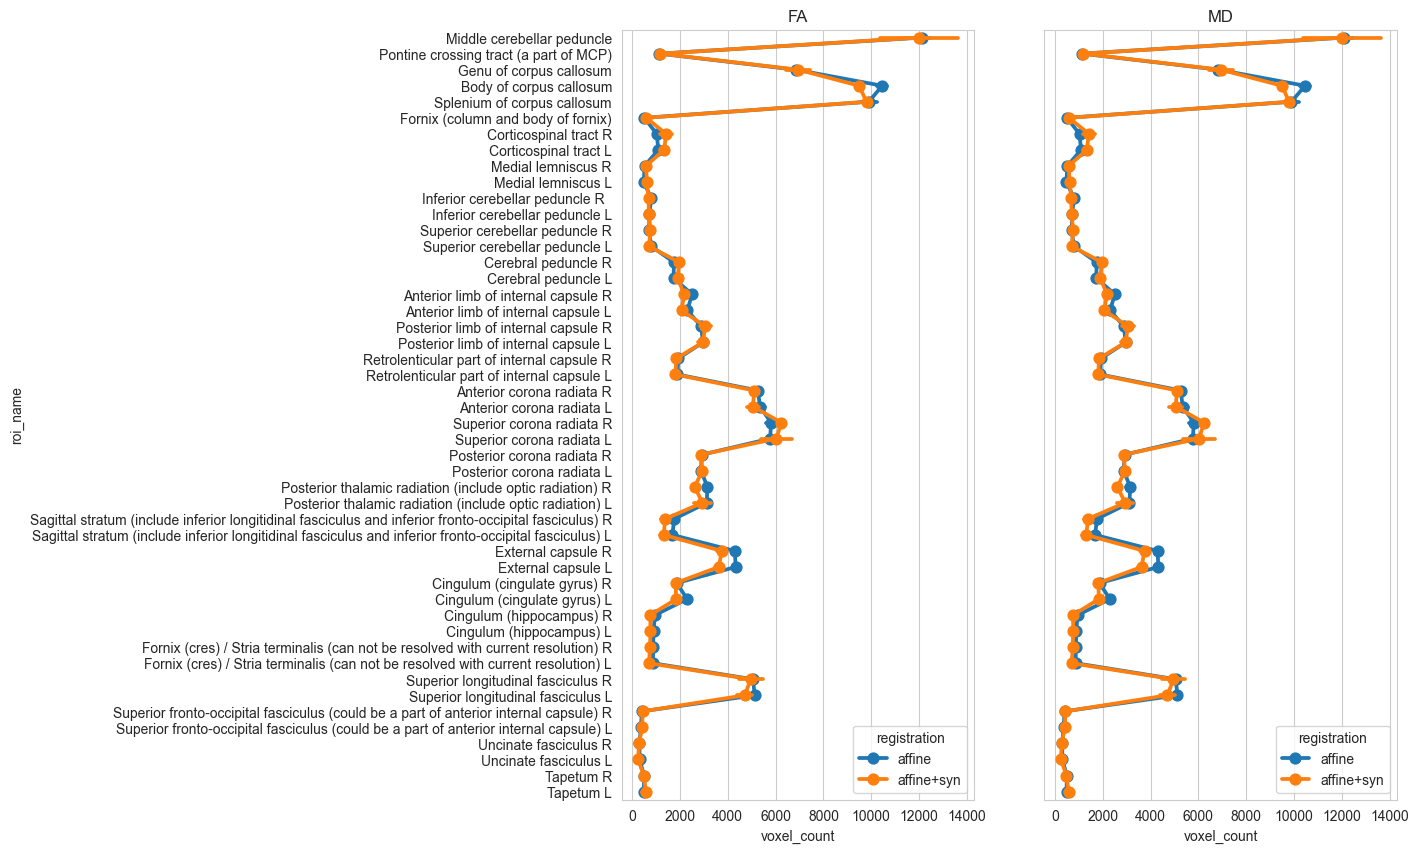

In [9]:

sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharex=False,sharey=True)

param_list = ["fa","md"]

idp_df = idp_df[idp_df["roi_name"] != "Unclassified"]
for i, ax in enumerate(axes.flatten()):
    plot_df = idp_df[
        (idp_df["param"] == param_list[i]) &
        (idp_df["model"] == "dti")
                     ].copy()
    sns.pointplot(y="roi_name", x="voxel_count", hue="registration", ax=ax, 
                data=plot_df)
    ax.set_title(f"{param_list[i].upper()}")